# 导入库

In [341]:
from sklearn.datasets import load_iris
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

## 导入数据

In [342]:
iris = load_iris()                           # 导入数据
iris_data_keys = []     
for elem in iris.keys():                     # 获取数据字典的keys
    iris_data_keys.append(elem)
iris_data = iris[iris_data_keys[0]]        # 通过key获取对应的数据
iris_target = iris[iris_data_keys[1]]      # 获取种类标签
iris_target_names = iris[iris_data_keys[3]]      # 获取标签名称
iris_feature_names = iris[iris_data_keys[5]]     # 获取特征名称

## 将数据进行叠加，使之成为DATAFRAME数据结构

In [343]:
iris_df = pd.DataFrame(iris_data,columns=iris_feature_names)    # 是数据data转换为dataframe数据结构，列为iris_feature_names列表中的数据
iris_df['target'] = iris_target                                 # 添加标签列
df_columns = iris_df.columns
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## 特征与标签的关联性

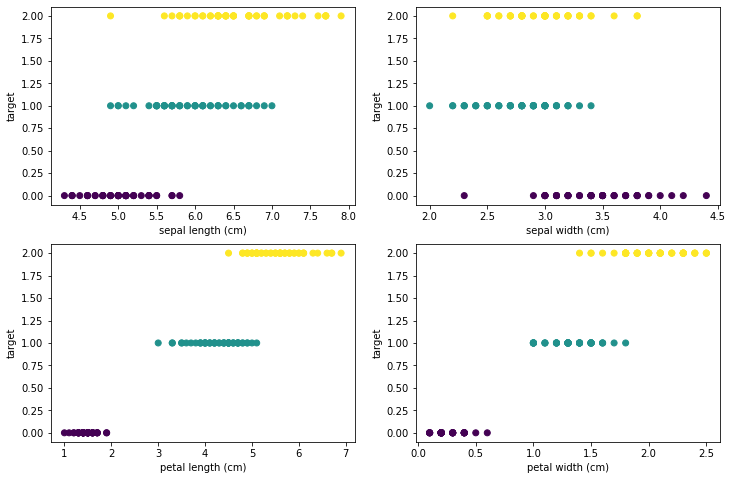

In [344]:
plt.figure(figsize=(12,8))                 # 创建一个画布，指定画布的大小(12x8)和像素
ax1 = plt.subplot(221)                     # 221代表：2x2矩阵的第1个位置
plt.xlabel(df_columns[0])
plt.ylabel(df_columns[4])
ax1.scatter(x=iris_df[df_columns[0]],y=iris_df[df_columns[4]],c=iris_df[df_columns[4]])

ax2 = plt.subplot(222)
plt.xlabel(df_columns[1])
plt.ylabel(df_columns[4])
ax2.scatter(x=iris_df[df_columns[1]],y=iris_df[df_columns[4]],c=iris_df[df_columns[4]])

ax3 = plt.subplot(223)
plt.xlabel(df_columns[2])
plt.ylabel(df_columns[4])
ax3.scatter(x=iris_df[df_columns[2]],y=iris_df[df_columns[4]],c=iris_df[df_columns[4]])

ax4 = plt.subplot(224)
plt.xlabel(df_columns[3])
plt.ylabel(df_columns[4])
ax4.scatter(x=iris_df[df_columns[3]],y=iris_df[df_columns[4]],c=iris_df[df_columns[4]])

plt.show()

## 特征与特征之间的关联

### 获取数据两两之间的组合

In [345]:
combination = []    # 排列组合的列表
for i in range(4):  # 获取数据两两之间比较的索引值
    elem = [i]
    for j in range(i+1,4):
        elem.append(j)
        elem_copy = elem.copy()
        if(elem_copy not in combination):
            combination.append(elem_copy)
        elem.pop(1)

combination

[[0, 1], [0, 2], [0, 3], [1, 2], [1, 3], [2, 3]]

### 各特征之间的关联

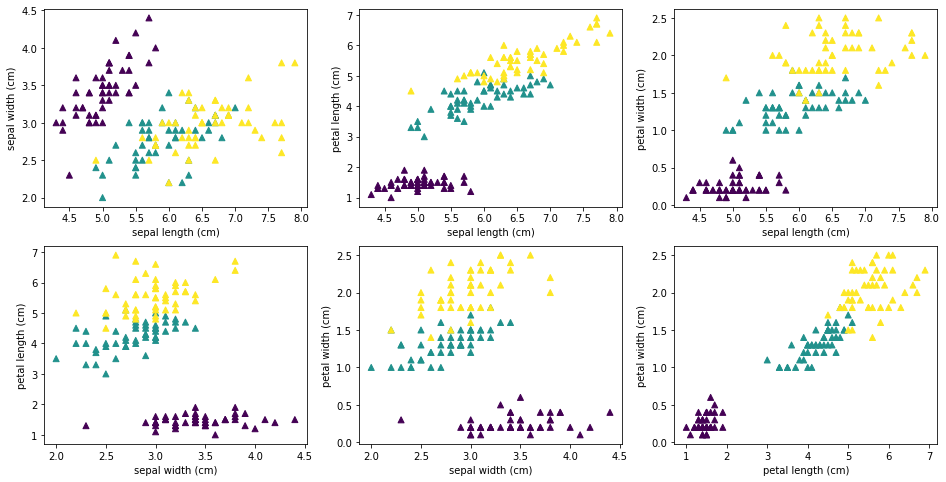

In [346]:
# 根据以上的组合进行特征关联分析

plt.figure(figsize=(16,8))                 # 创建一个画布

x,y,pos=2,3,1                     # 图的位置
for index in combination:
    ax = plt.subplot(x,y,pos)
    pos+=1
    plt.xlabel(df_columns[index[0]])
    plt.ylabel(df_columns[index[1]])
    ax.scatter(x=iris_df[df_columns[index[0]]],y=iris_df[df_columns[index[1]]],c=iris_df[df_columns[4]],marker='^')

## 多分类边界可视化
- [meshgrid()方法参考](https://blog.csdn.net/zhangkaikai36/article/details/123382937)

In [347]:
def classify(df:pd.DataFrame,columns:list,combination:list,clf)->None:
    plt.figure(figsize=(16,8))
    x,y,pos=2,3,1
    step=0.02                   # 步长为0.02
    color='ryb'
    for index in combination:
        ax = plt.subplot(x,y,pos)
        pos+=1
        # 得到ndarrar类型的数据
        train = np.array(df[[columns[index[0]],columns[index[1]]]])     # ndarray类型
        target = df[columns[4]]
        clf.fit(train,target)
        # 获取特征的最大最小值
        x_min,x_max = train[...,0].min()-1, train[...,0].max()+1        # 只有ndarray类型可以使用这种方法输出元素，list类型只有[slice]即切片类型，dataframe也是只有切片类型
        y_min,y_max = train[...,1].min()-1,  train[...,1].max()+1
        # 获取
        xx,yy = np.meshgrid(np.arange(x_min,x_max,step),np.arange(y_min,y_max,step))
        # 预测数据
        Z = clf.predict(np.c_[xx.ravel(),yy.ravel()])
        Z = Z.reshape(xx.shape)
        plt.contourf(xx, yy, Z,cmap=plt.cm.RdYlBu)          # 决策边界绘制
        # plt.pcolormesh(xx,yy,Z,cmap=plt.cm.Paired)        # 也是决策边界的绘画
        # 设置xy轴的标签
        plt.xlabel(columns[index[0]])
        plt.ylabel(columns[index[1]])
        # 对于每一种类的花单独画图
        for i, c in zip(range(len(color)), color):          # 画对应的颜色
            idx = np.where(target == i)                     # 返回target数组中 数据==i 的索引值，即返回一个数组，数组中全是值i的索引
            ax.scatter(train[idx, 0], train[idx, 1], c=c,cmap=plt.cm.RdYlBu,marker='^')
    plt.show()

## 训练模型

### 数据分成测试数据和训练数据

In [369]:
from sklearn.model_selection import train_test_split    # 引入分类模块
from sklearn import metrics                             # 引入评测模块
train = iris_df[[df_columns[0],df_columns[1],df_columns[2],df_columns[3]]]
target = iris_df[df_columns[4]]
X_train,X_test,y_train,y_test = train_test_split(train,target,test_size=0.5,random_state=5)     # 分成两份数据

### 训练svm模型然后得到分类边界图

svm.SVC() accuracy_score =  0.9733333333333334


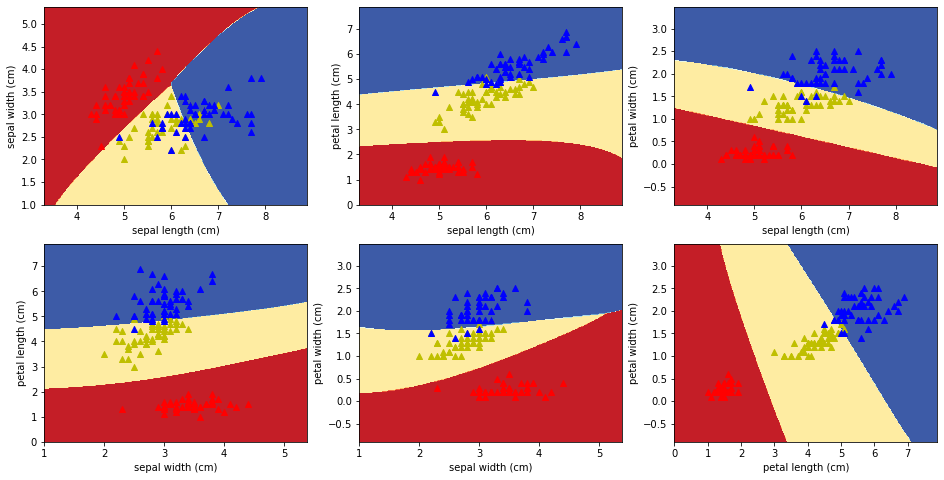

In [370]:
from sklearn import svm

clf = svm.SVC()                     # SVC可以处理多类问题，SVR只能处理二类问题
clf.fit(X=X_train,y=y_train)
predict = clf.predict(X_test)
score = metrics.accuracy_score(y_true=y_test,y_pred=predict)
print("svm.SVC() accuracy_score = ",score)
classify(iris_df,df_columns,combination,svm.SVC())

### 训练RandomForestClassifier模型
- 参数介绍

| 参数                    | 含义                                                         |
| ----------------------- | ------------------------------------------------------------ |
| `criterion`             | 不纯度的衡量指标，有基尼系数和信息熵两种选择                 |
| `max_depth`             | 树的最大深度，超过最大深度的树枝都会被剪掉                   |
| `min_samples_leaf`      | 一个节点在分支后的每个子节点都必须包含至少`min_samples_leaf`个训练样本，否则分支就不会发生 |
| `min_samples_split`     | 一个节点必须要包含至少`min_samples_split`个训练样本，这个节点才被允许分支，否则分支不会发生。 |
| `max_features`          | 限制分支时考虑的特振奋个数，超过限制个数的特征都会被舍弃，默认值为总特征个数开平方取整。 |
| `min_impurity_decrease` | 限制信息增益的大小，信息增益小于设定数值的分支不会发生 |
| `n_estimator`           |森林中树木的数量，即基评估器的数量。这个参数对随机森林模型的精确性影响是单调的`n_estimator`越大，模型的效果越好。但相应的，任何模型都有决策边界，`n_estimator`达到一定程度后，随机森林的精确性往往不再上升或开始波动，并且,n_estimator越大，需要的计算量和内存也就越大，训练的时间也会越来越长。|

ensemble.RandomForestClassifier() accuracy_score =  0.9466666666666667


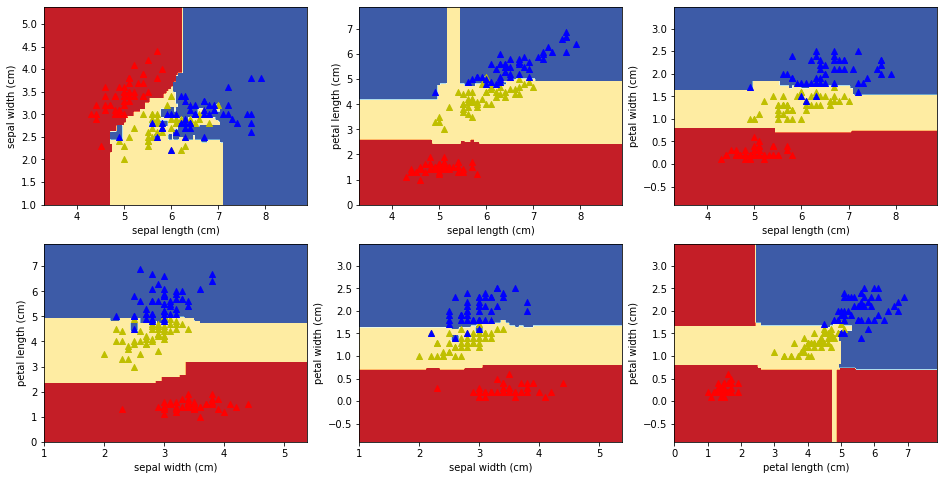

In [371]:
from sklearn import ensemble

clf = ensemble.RandomForestClassifier()     # 随机森林分类器 n_estimators默认100
clf.fit(X=X_train,y=y_train)
predict = clf.predict(X_test)
score = metrics.accuracy_score(y_true=y_test,y_pred=predict)
print("ensemble.RandomForestClassifier() accuracy_score = ",score)
classify(iris_df,df_columns,combination,ensemble.RandomForestClassifier())

### 训练GradientBoostingClassifier模型

ensemble.GradientBoostingClassifier() accuracy_score =  0.9466666666666667


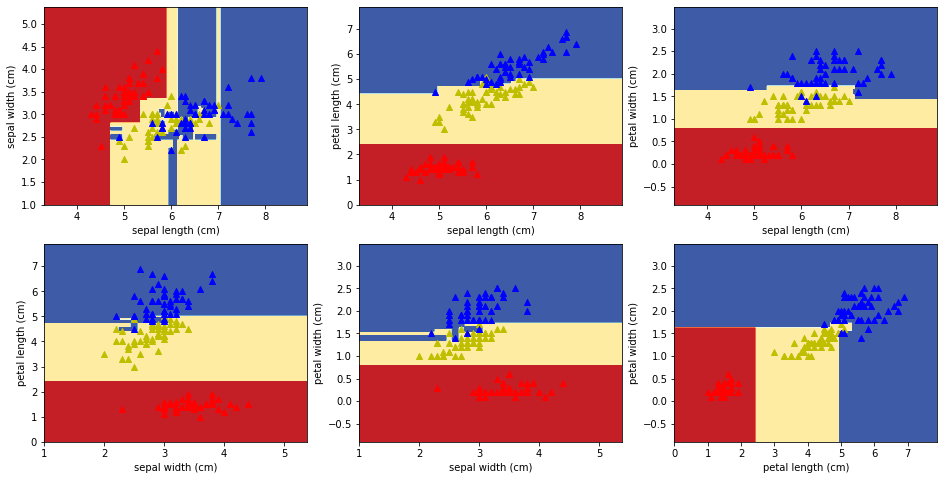

In [372]:
clf = ensemble.GradientBoostingClassifier()     # 随机森林分类器 n_estimators默认100
clf.fit(X=X_train,y=y_train)
predict = clf.predict(X_test)
score = metrics.accuracy_score(y_true=y_test,y_pred=predict)
print("ensemble.GradientBoostingClassifier() accuracy_score = ",score)
classify(iris_df,df_columns,combination,ensemble.GradientBoostingClassifier())

### 训练KNeighborsClassifier模型

neighbors.KNeighborsClassifier() accuracy_score =  0.96


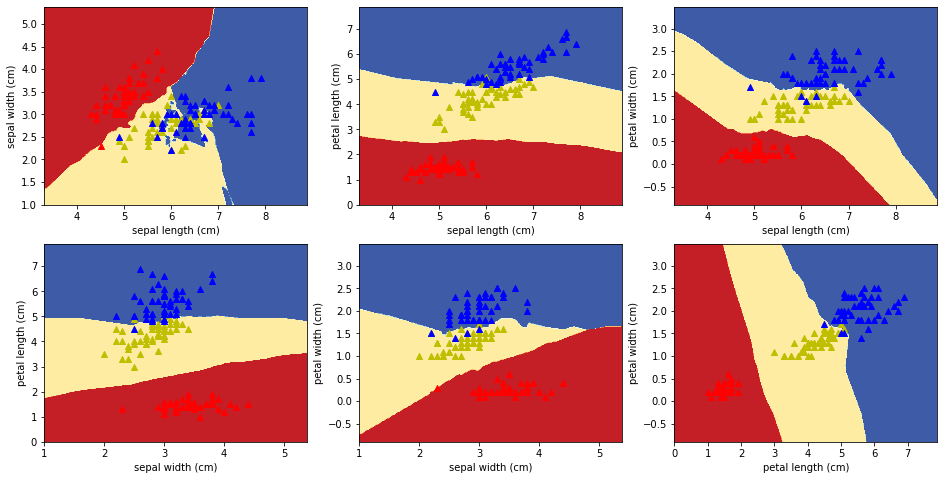

In [373]:
from sklearn import neighbors

clf = neighbors.KNeighborsClassifier()
clf.fit(X=X_train,y=y_train)
predict = clf.predict(X_test)
score = metrics.accuracy_score(y_true=y_test,y_pred=predict)
print("neighbors.KNeighborsClassifier() accuracy_score = ",score)
classify(iris_df,df_columns,combination,neighbors.KNeighborsClassifier())

### 训练GaussianNB模型

naive_bayes.GaussianNB() accuracy_score =  0.9466666666666667


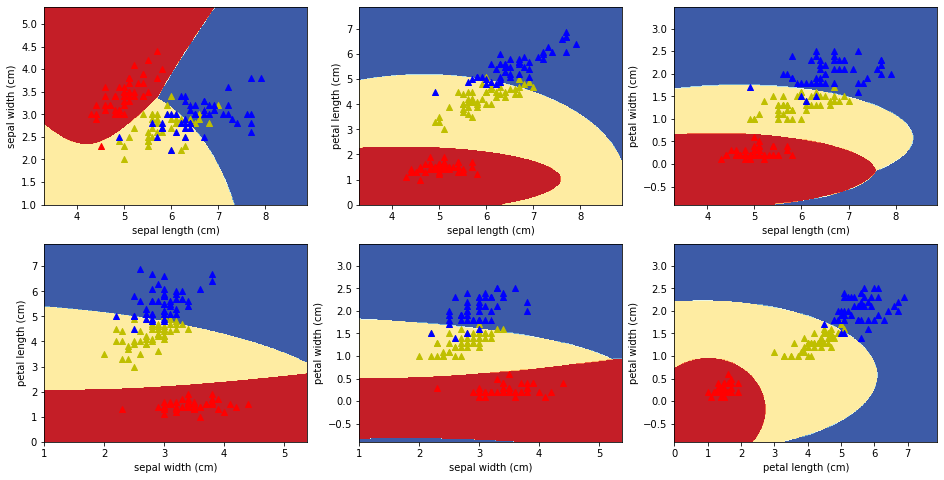

In [374]:
from sklearn import naive_bayes

clf = naive_bayes.GaussianNB()
clf.fit(X=X_train,y=y_train)
predict = clf.predict(X_test)
score = metrics.accuracy_score(y_true=y_test,y_pred=predict)
print("naive_bayes.GaussianNB() accuracy_score = ",score)
classify(iris_df,df_columns,combination,naive_bayes.GaussianNB())

### 训练模型

tree.DecisionTreeClassifier() accuracy_score =  0.9733333333333334


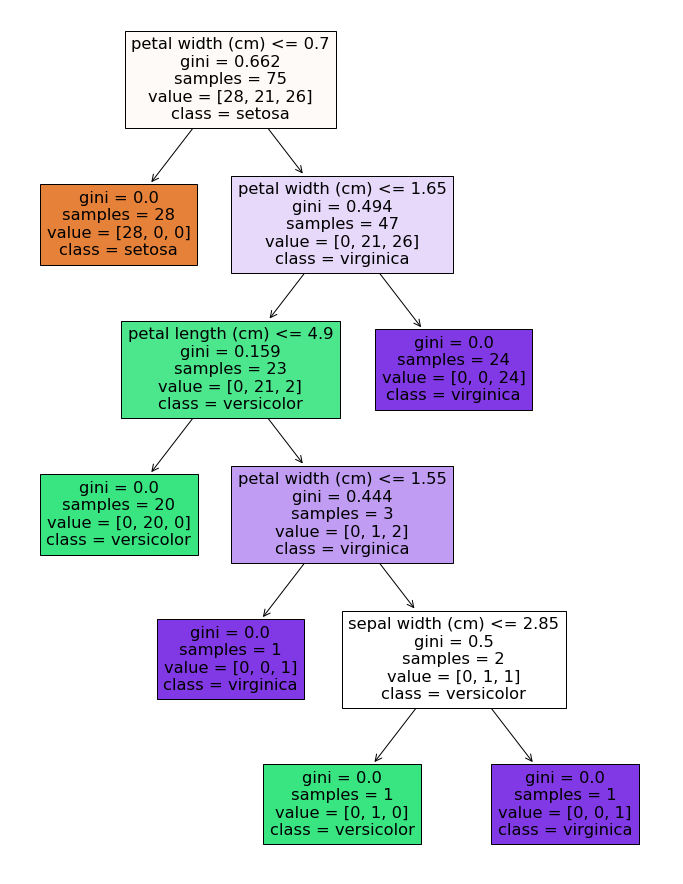

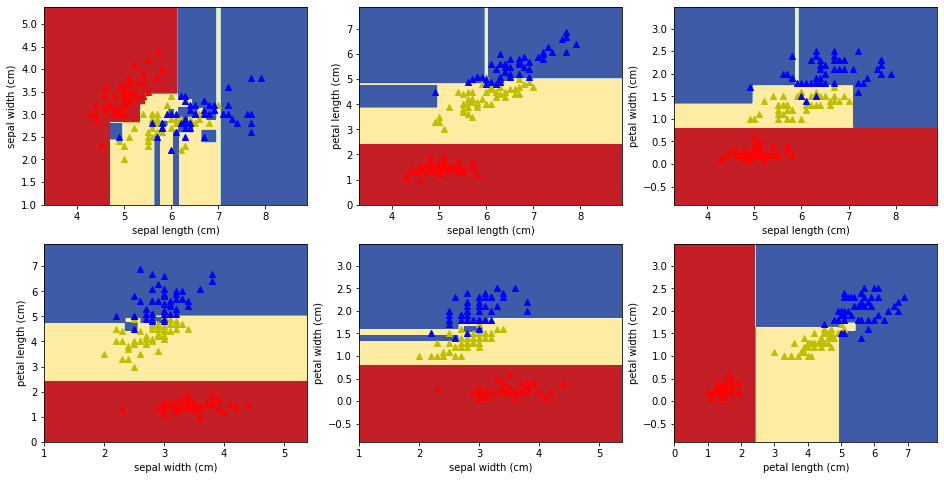

In [375]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf.fit(X=X_train,y=y_train)
predict = clf.predict(X_test)
score = metrics.accuracy_score(y_true=y_test,y_pred=predict)
print("tree.DecisionTreeClassifier() accuracy_score = ",score)
# 决策树可视化
plt.figure(figsize=(12,16))
tree.plot_tree(clf,feature_names=iris_feature_names ,class_names=iris_target_names,filled=True)
plt.show()
# 边界可视化
classify(iris_df,df_columns,combination,tree.DecisionTreeClassifier())